In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Too flexible structure, but will do
FILES = {
    'stopped_car': {
        'sensor_layer': {
            'general': './stopped_car/sensor_layer/general.csv'
        },
        'fusion_layer': {
            'temporal_alignment': './stopped_car/fusion_layer/temporal_alignment.csv',
            'no_temporal_alignment': './stopped_car/fusion_layer/no_temporal_alignment.csv',
        },
        'application_layer': {
            'temporal_alignment': './stopped_car/application_layer/temporal_alignment.csv',
            'no_temporal_alignment': './stopped_car/application_layer/no_temporal_alignment.csv',
        },
    },
    'both_moving': {
        'sensor_layer': {
            'general': './both_moving/sensor_layer/general.csv'
        },
        'fusion_layer': {
            'temporal_alignment': './both_moving/fusion_layer/temporal_alignment.csv',
            'no_temporal_alignment': './both_moving/fusion_layer/no_temporal_alignment.csv',
        },
        'application_layer': {
            'temporal_alignment': './both_moving/application_layer/temporal_alignment.csv',
            'no_temporal_alignment': './both_moving/application_layer/no_temporal_alignment.csv',
        },
    },
    'many_objects': {
        'sensor_layer': {
            'general': './many_objects/sensor_layer/general.csv',
            'extra': './many_objects/sensor_layer/extra_objs.csv'
        },
        'application_layer': {
            'temporal_alignment': './many_objects/application_layer/temporal_alignment.csv',
        }
    }
}

## Many Objects

Experiments about the `city tour` experiment

In [2]:
sensor_df_file = FILES['many_objects']['sensor_layer']['general']

sensor_df = pd.read_csv(
    sensor_df_file,
    names=['timestamp', 'sensor_name', 'n_objects', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'yaw', 'yaw_rate']
)

sensor_df.head()

,timestamp,sensor_name,n_objects,x,y,vx,vy,ax,ay,yaw,yaw_rate
0,1622416175927008527,sensor1,1,-148.99678,-9.21519,0.00004,2.84603,-0.00014,-8.72404,-1.57078,-0.00001
1,1622416175936277197,sensor2,1,-148.99678,-9.21519,0.00004,2.84603,-0.00014,-8.72404,-1.57078,-0.00001
2,1622416176006797541,sensor1,1,-148.99678,-9.04635,0.00003,2.27556,-0.00012,-8.51131,-1.57078,-0.00001
3,1622416176016416383,sensor2,1,-148.99678,-9.04635,0.00003,2.27556,-0.00012,-8.51131,-1.57078,-0.00001
4,1622416176069062845,sensor1,1,-148.99678,-8.89868,0.00002,1.63745,-0.00012,-8.27606,-1.57078,-0.00000


In [3]:
extra_objs_df_file = FILES['many_objects']['sensor_layer']['extra']

extra_objs_df = pd.read_csv(
    extra_objs_df_file,
    names=['timestamp', 'actor_id', 'type_id', 'distance', 'length', 'width', 'x', 'y']
)

extra_objs_df.head()

,timestamp,actor_id,type_id,distance,length,width,x,y
0,1622416175929321046,130,walker.pedestrian.0025,24.002874,0.375358,0.375358,-158.190659,12.957102
1,1622416175940958860,130,walker.pedestrian.0025,24.002874,0.375358,0.375358,-158.190659,12.957102
2,1622416176009119230,130,walker.pedestrian.0025,23.741325,0.375358,0.375358,-158.189301,12.843102
3,1622416176020669017,130,walker.pedestrian.0025,23.741325,0.375358,0.375358,-158.189301,12.843102
4,1622416176080602255,130,walker.pedestrian.0025,23.483188,0.375358,0.375358,-158.185837,12.712002


In [4]:
application_df_file = FILES['many_objects']['application_layer']['temporal_alignment']

application_df = pd.read_csv(
    application_df_file,
    names=['timestamp', 'global_list_id', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'yaw', 'yaw_rate', 'length', 'width']
)

application_df.head()

,timestamp,global_list_id,x,y,vx,vy,ax,ay,yaw,yaw_rate,length,width
0,1622416585767784013,1,22.17217,-9.19418,-4.54426,-0.07726,8.71036,0.27149,3.17679,0.00001,0.37536,0.37536
1,1622416585779685371,2,22.17217,-9.19418,-4.54426,-0.07726,8.71036,0.27149,-3.10640,0.00001,0.37536,0.37536
2,1622416585847917433,3,21.83004,-9.19999,-5.15873,-0.08771,8.71036,0.27149,-3.10640,0.00001,0.37536,0.37536
3,1622416585847917433,3,21.88932,-9.19282,-3.97463,-0.05593,8.49880,0.31827,3.16265,0.00001,0.37536,0.37536
4,1622416585856845748,4,21.78002,-9.20083,-5.24254,-0.08913,8.71036,0.27149,-3.10640,0.00001,0.37536,0.37536


In [5]:
from IPython.display import display

best_case = extra_objs_df.drop_duplicates('actor_id').groupby(['length', 'width'])['timestamp'].count()
worst_case = extra_objs_df.groupby(['length', 'width'])['timestamp'].count()
results = application_df[application_df.global_list_id == application_df.global_list_id.max()].groupby(['length', 'width'])['timestamp'].count()

results, best_case, worst_case = [
    serie.rename(index=lambda x: round(x, 3))
    for serie in (results, best_case, worst_case)
]

results_df = pd.DataFrame({'result': results, 'best_case': best_case, 'worst_case': worst_case})
results_df['score'] = np.round(1 - (results - best_case)/(worst_case - best_case), 2)
results_df['dimensions'] = results_df.apply(lambda row: f"({row.name[0]:0.2f}, {row.name[1]:0.2f})", axis=1)

results_df = results_df.set_index('dimensions')

display(results_df)
print(results_df.to_latex())

,result,best_case,worst_case,score
dimensions,,,,
"(0.38, 0.38)",438,7,2336,0.81
"(0.50, 0.50)",93,1,328,0.72
"(1.49, 0.86)",42,1,948,0.96
"(2.21, 0.87)",14,1,234,0.94
"(3.63, 1.84)",9,1,224,0.96
"(3.71, 1.79)",5,1,127,0.97
"(3.81, 1.97)",88,1,1494,0.94
"(3.87, 1.91)",9,3,490,0.99
"(4.19, 1.82)",22,2,348,0.94


\begin{tabular}{lrrrr}
\toprule
{} &  result &  best\_case &  worst\_case &  score \\
dimensions   &         &            &             &        \\
\midrule
(0.38, 0.38) &     438 &          7 &        2336 &   0.81 \\
(0.50, 0.50) &      93 &          1 &         328 &   0.72 \\
(1.49, 0.86) &      42 &          1 &         948 &   0.96 \\
(2.21, 0.87) &      14 &          1 &         234 &   0.94 \\
(3.63, 1.84) &       9 &          1 &         224 &   0.96 \\
(3.71, 1.79) &       5 &          1 &         127 &   0.97 \\
(3.81, 1.97) &      88 &          1 &        1494 &   0.94 \\
(3.87, 1.91) &       9 &          3 &         490 &   0.99 \\
(4.19, 1.82) &      22 &          2 &         348 &   0.94 \\
(4.67, 2.00) &      36 &          1 &        1491 &   0.98 \\
(4.72, 1.90) &      31 &          2 &         432 &   0.93 \\
(4.79, 2.16) &       3 &          1 &         148 &   0.99 \\
(4.86, 2.03) &      51 &          2 &        1570 &   0.97 \\
(4.97, 2.04) &       7 &          1 &

In [6]:
from IPython.display import display

type_id_info_df = extra_objs_df \
.drop_duplicates('type_id') \
.sort_values(by=['length', 'width', 'type_id']) \
.set_index(['length', 'width'])

type_id_info_df['dimensions'] = type_id_info_df.apply(lambda row: f"({row.name[0]:0.2f}, {row.name[1]:0.2f})", axis=1)
type_id_info = type_id_info_df.groupby('dimensions')['type_id'].agg(type_id=lambda types: '\n'.join(map(str, set(types))))

display(type_id_info.style.set_properties(**{'text-align': 'center', 'white-space': 'pre-wrap'}))

# Markdown handles \n better than latex
print(type_id_info.to_markdown())

,type_id
dimensions,
"(0.38, 0.38)",walker.pedestrian.0026 walker.pedestrian.0025 walker.pedestrian.0019 walker.pedestrian.0004 walker.pedestrian.0016 walker.pedestrian.0022 walker.pedestrian.0014
"(0.50, 0.50)",walker.pedestrian.0010
"(1.49, 0.86)",vehicle.bh.crossbike
"(2.21, 0.87)",vehicle.yamaha.yzf
"(3.63, 1.85)",vehicle.nissan.micra
"(3.71, 1.79)",vehicle.audi.a2
"(3.81, 1.97)",vehicle.mini.cooperst
"(3.87, 1.91)",vehicle.jeep.wrangler_rubicon
"(4.19, 1.82)",vehicle.seat.leon


| dimensions   | type_id                               |
|:-------------|:--------------------------------------|
| (0.38, 0.38) | walker.pedestrian.0026                |
|              | walker.pedestrian.0025                |
|              | walker.pedestrian.0019                |
|              | walker.pedestrian.0004                |
|              | walker.pedestrian.0016                |
|              | walker.pedestrian.0022                |
|              | walker.pedestrian.0014                |
| (0.50, 0.50) | walker.pedestrian.0010                |
| (1.49, 0.86) | vehicle.bh.crossbike                  |
| (2.21, 0.87) | vehicle.yamaha.yzf                    |
| (3.63, 1.85) | vehicle.nissan.micra                  |
| (3.71, 1.79) | vehicle.audi.a2                       |
| (3.81, 1.97) | vehicle.mini.cooperst                 |
| (3.87, 1.91) | vehicle.jeep.wrangler_rubicon         |
| (4.19, 1.82) | vehicle.seat.leon                     |
| (4.67, 2.00) | vehicle.merced

Média de FPS: 29.06 +/- 3.63


count    1810.000000
mean       67.915722
std        39.762579
min         0.000000
25%        34.345387
50%        70.447980
75%        95.812422
max       141.056327
Name: timestamp, dtype: float64

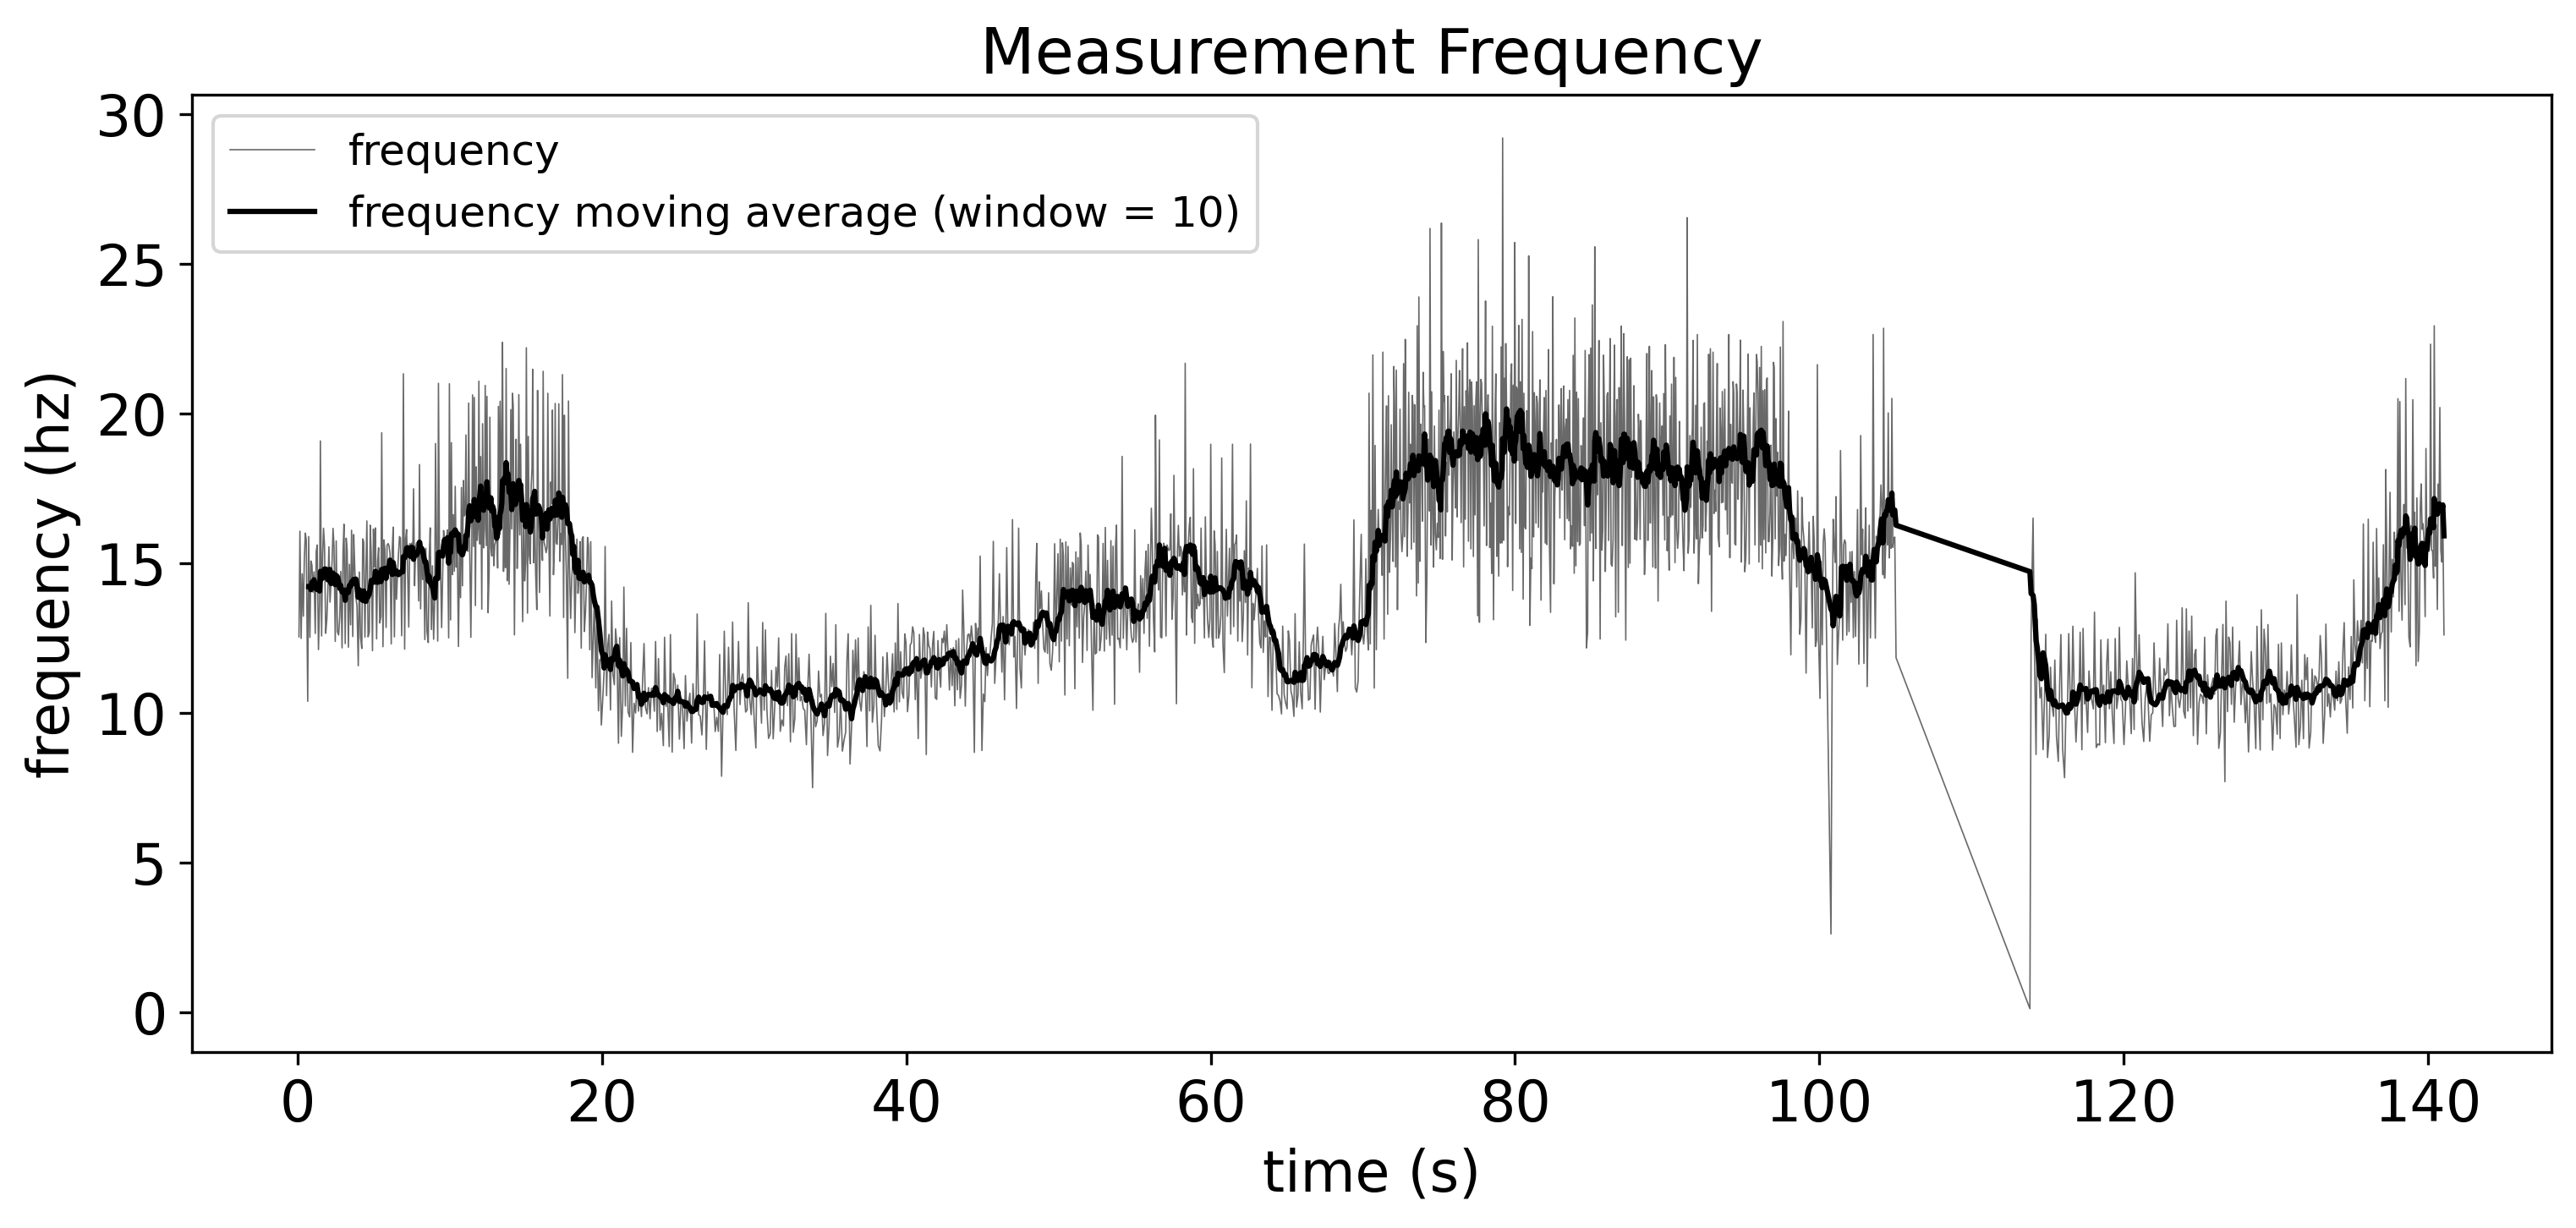

In [7]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

timestamps = sensor_df[sensor_df.sensor_name == 'sensor1']['timestamp'].drop_duplicates()
timestamps_small = (timestamps - timestamps.min()) / 10**9
timestamps_diff = timestamps_small.diff().dropna()
timestamps_diff.index = timestamps_small.iloc[1:]

timestamps_fps = 1 / timestamps_diff

window_mean = 10
ax.plot(timestamps_fps, lw=0.4, c='dimgrey', label='frequency')
ax.plot(timestamps_fps.rolling(window_mean).mean(), c='k', lw=1.5, label=f'frequency moving average (window = {window_mean})')

ax.set_title('Measurement Frequency', fontsize=18)
ax.set_xlabel('time (s)', fontsize=16)
ax.set_ylabel('frequency (hz)', fontsize=16)
ax.legend(fontsize=12)
ax.tick_params(labelsize=16)

fig.savefig(f'many_objects/sensor_layer/fps.png')

# mean()*2 because are two sensors
print(f'Média de FPS: {timestamps_fps.mean()*2:0.2f} +/- {timestamps_fps.std():0.2f}')

timestamps_fps.head()

timestamps_small.describe()

/home/icaro/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


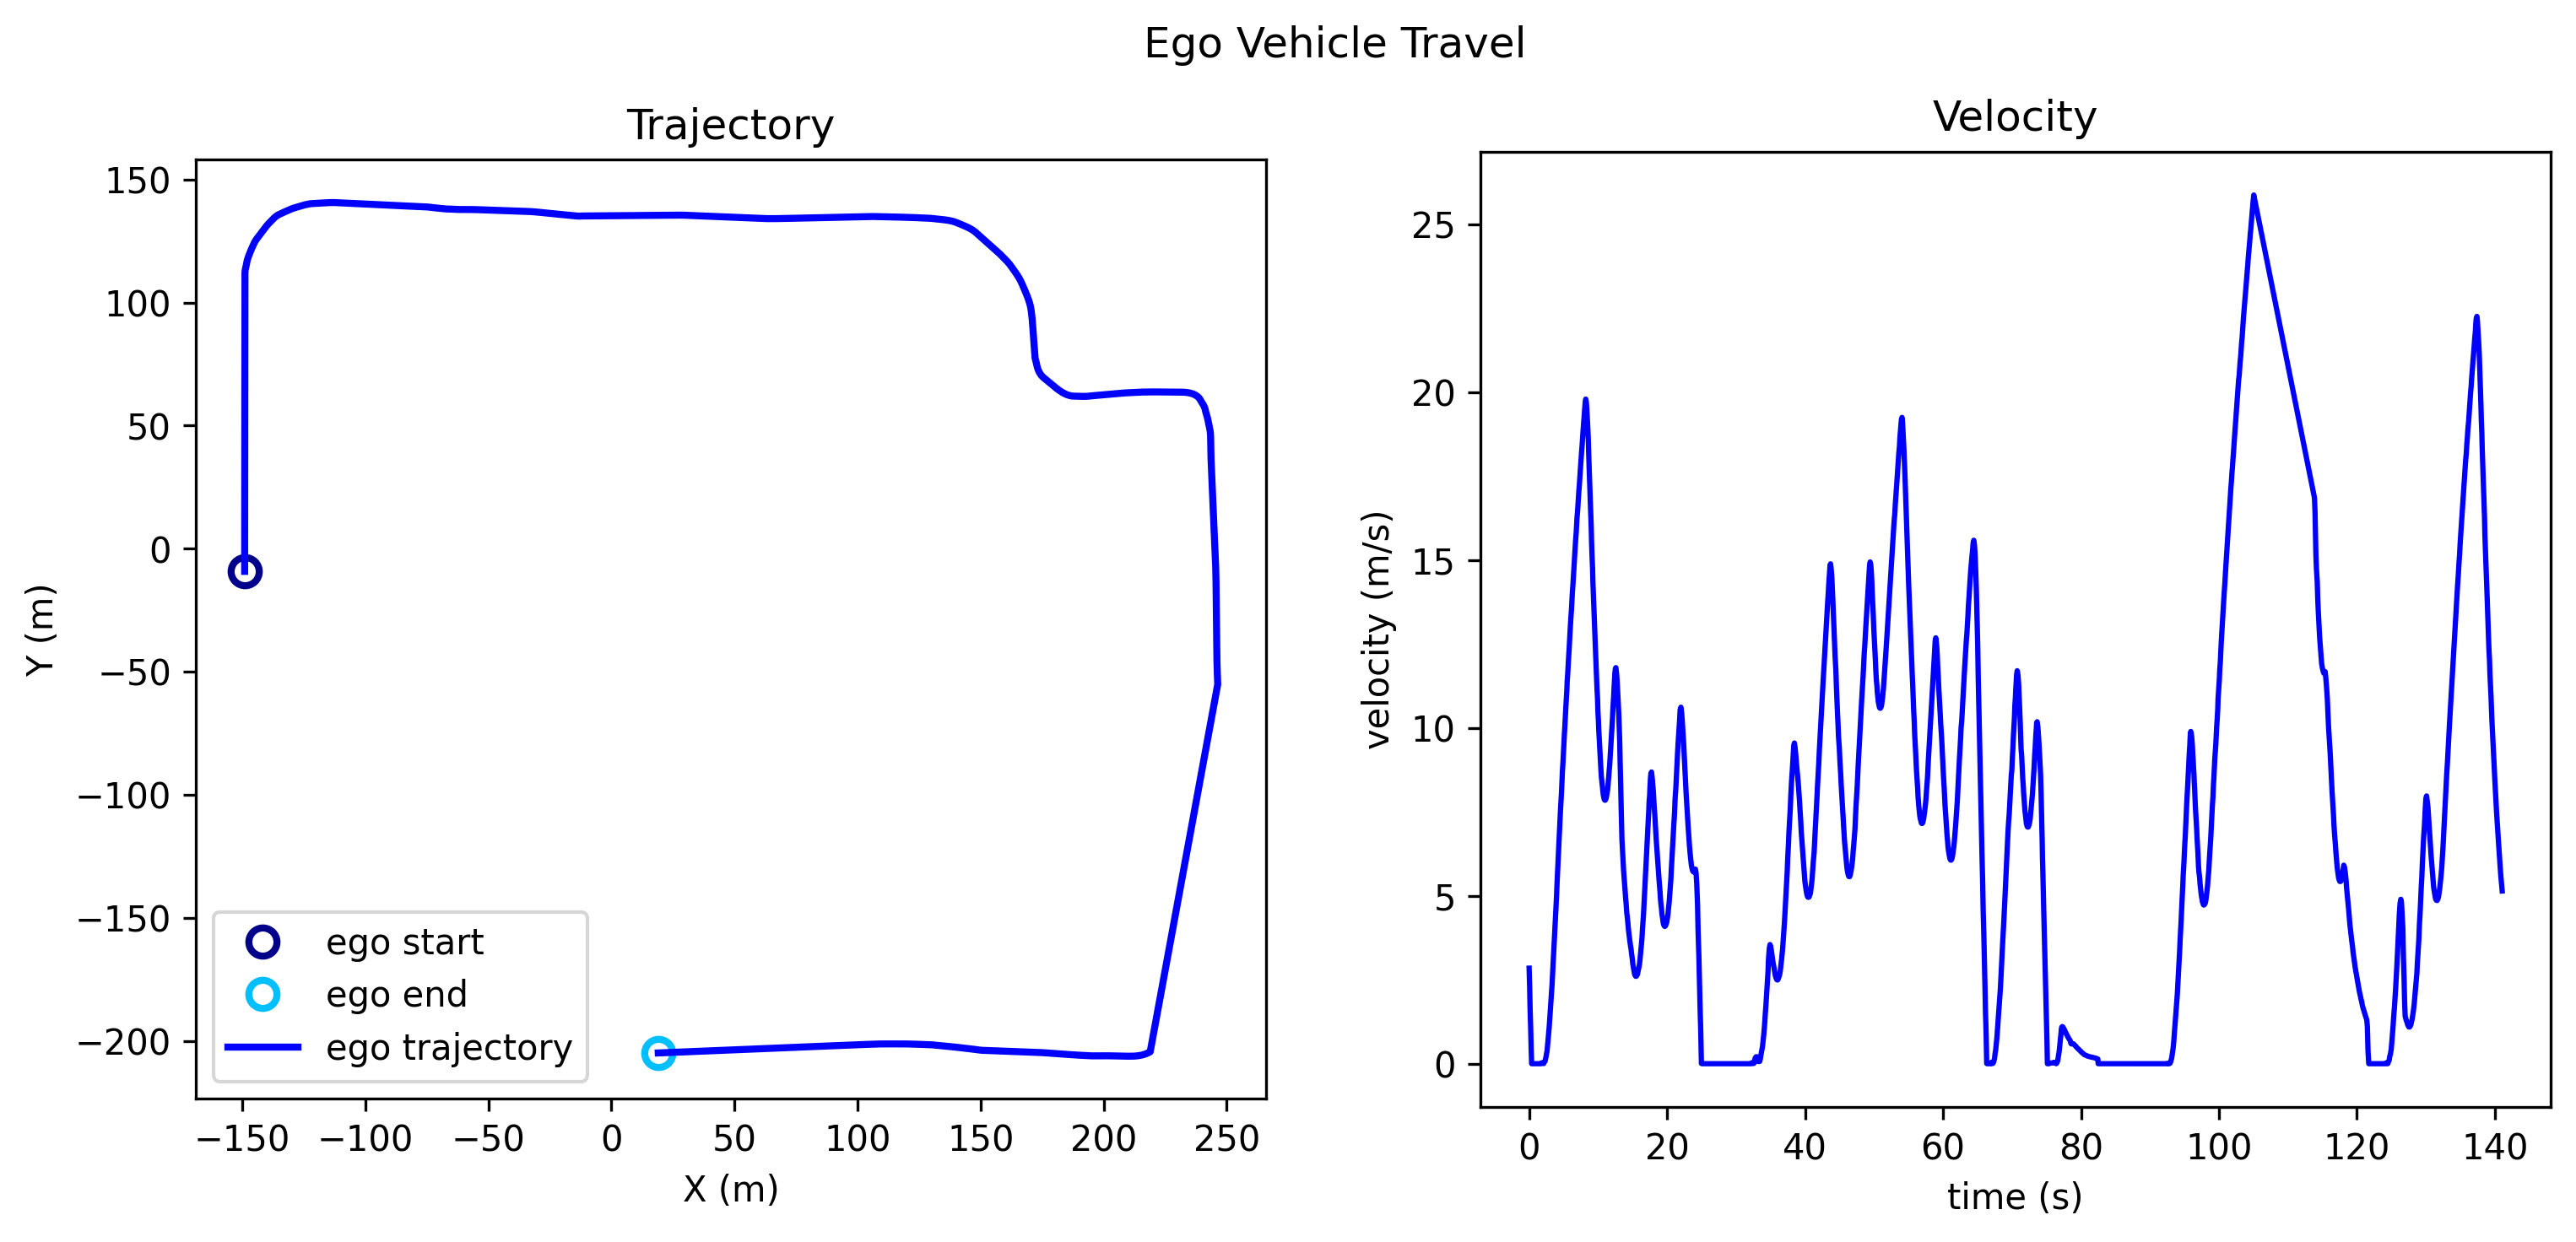

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=300)
fig.suptitle("Ego Vehicle Travel")

# Plotting trajectory

sensor_df1 = sensor_df[sensor_df.sensor_name == 'sensor1']
sensor_df1['timestamp'] = (sensor_df1['timestamp'] - sensor_df1['timestamp'].min()) / 10**9

start = sensor_df1['x'].iloc[0], sensor_df1['y'].iloc[0]
end = sensor_df1['x'].iloc[-1], sensor_df1['y'].iloc[-1]
axs[0].plot(start[0], start[1], 'o', label='ego start', c='w', ms=8, mew=2, mec='darkblue')
axs[0].plot(end[0], end[1], 'o', label='ego end', c='w', ms=8, mew=2, mec='deepskyblue')

axs[0].plot(sensor_df1['x'], sensor_df1['y'], lw=2, label='ego trajectory', c='b')
    
axs[0].set(
    title='Trajectory',
    xlabel='X (m)',
    ylabel='Y (m)',
    aspect='equal',
    #xlim=(-50, -155)
)
axs[0].legend()

# Plotting velocity

ego_velocity = np.hypot(sensor_df1['vx'], sensor_df1['vy'])

axs[1].plot(sensor_df1['timestamp'], ego_velocity, label='ego', c='b')

axs[1].set(
    title='Velocity',
    xlabel='time (s)',
    ylabel='velocity (m/s)',
)
# axs[1].legend()

fig.savefig(f'many_objects/vehicle_travel.png')

## Others (Choose one)

In [9]:
EXPERIMENT_NAME = 'both_moving'  # Choosing experiment here
EXPERIMENT_VARIATION = 'no_temporal_alignment'  # Choosing variation here
EXPERIMENT_FILES = FILES[EXPERIMENT_NAME]

In [10]:
sensor_df_file = EXPERIMENT_FILES['sensor_layer']['general']
sensor_df = pd.read_csv(
    sensor_df_file,
    names=['timestamp', 'sensor_name', 'n_objects', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'yaw', 'yaw_rate']
)

print('Sensor DF first measurement:', sensor_df['timestamp'].min())

sensor_df['timestamp'] = (sensor_df['timestamp'] - sensor_df['timestamp'].min()) / 10**9
sensor_df1 = sensor_df[sensor_df.sensor_name == 'sensor1']

sensor_df1.head()

Sensor DF first measurement: 1621242623651325792


,timestamp,sensor_name,n_objects,x,y,vx,vy,ax,ay,yaw,yaw_rate
0,0.000000,sensor1,1,-148.99478,-80.58735,0.03294,0.47233,0.06468,0.64271,-1.56875,0.02048
2,0.096150,sensor1,1,-148.99228,-80.54408,0.03745,0.53739,0.05280,0.76231,-1.56715,0.01671
4,0.192271,sensor1,1,-148.98721,-80.49280,0.09027,0.65453,0.62016,1.37526,-1.56371,0.05073
6,0.272085,sensor1,1,-148.98506,-80.42434,0.00747,0.79668,-0.87820,1.50777,-1.56286,0.00264
8,0.352307,sensor1,1,-148.98442,-80.35335,0.00725,0.93399,-0.00275,1.68477,-1.56294,-0.00266


In [11]:
sensor_df1 = sensor_df[sensor_df.sensor_name == 'sensor1']
sensor_df2 = sensor_df[sensor_df.sensor_name == 'sensor2']

shortest_size = min(sensor_df1.shape[0], sensor_df2.shape[0])

diff_between_sensors = (sensor_df2['timestamp'].iloc[:shortest_size].array - sensor_df1['timestamp'].iloc[:shortest_size].array)
diff_between_ticks = (sensor_df1['timestamp'].diff())

print(f'Mean time interval between sensors = {diff_between_sensors.mean()}s')
print(f'Mean time interval between ticks = {diff_between_ticks.mean()}s')

Mean time interval between sensors = 0.006259697243119341s
Mean time interval between ticks = 0.07715709641500766s


In [12]:
def obj_to_almost_relative(fusion_df, sensor_df):
    # Almost because don't transform all the elements, only the used in this notebook
    # Could have been used the transformation matrix, but this will also do
    
    angles = sensor_df['yaw'].copy()

    cos_angles = np.cos(angles)
    sin_angles = np.sin(angles)

    # Transforming back to CARLA reference frame
    tmp_df = fusion_df.copy()
    tmp_df['x'] = fusion_df['x']*cos_angles - fusion_df['y']*sin_angles
    tmp_df['y'] = fusion_df['x']*sin_angles + fusion_df['y']*cos_angles
    
    tmp_df['vx'] = fusion_df['vx']*cos_angles - fusion_df['vy']*sin_angles
    tmp_df['vy'] = fusion_df['vx']*sin_angles + fusion_df['vy']*cos_angles
    
    tmp_df['y'] = -tmp_df['y']
    tmp_df['vy'] = -tmp_df['vy']
    
    tmp_df[['x', 'y', 'vx', 'vy']] += sensor_df[['x', 'y', 'vx', 'vy']]
    
    return tmp_df

def is_obj_stopped(absolute_obj_pos_df):
    displacement_x = (absolute_obj_pos_df['x'].iloc[0] - absolute_obj_pos_df['x'].iloc[-1])
    displacement_y = (absolute_obj_pos_df['y'].iloc[0] - absolute_obj_pos_df['y'].iloc[-1])

    return (abs(displacement_x) + abs(displacement_y)) <= 1

In [13]:
fusion_df_file = EXPERIMENT_FILES['fusion_layer'][EXPERIMENT_VARIATION]
fusion_df = pd.read_csv(
    fusion_df_file,
    names=['timestamp', 'sensor_name', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'yaw', 'yaw_rate', 'idx_to_associate', 'association_score', 'association_failed']
)

print('Fusion DF first measurement:', fusion_df['timestamp'].min())

fusion_df['timestamp'] = (fusion_df['timestamp'] - fusion_df['timestamp'].min()) / 10**9
fusion_df1 = fusion_df[fusion_df.sensor_name == 'sensor1']

fusion_df1.head()

Fusion DF first measurement: 1621242623651325792


,timestamp,sensor_name,x,y,vx,vy,ax,ay,yaw,yaw_rate,idx_to_associate,association_score,association_failed
0,0.000000,sensor1,12.32606,0.85077,3.11015,-0.43930,2.56292,-0.74795,-0.06124,-0.13004,0,0.500,1
2,0.096150,sensor1,12.60301,0.79516,3.31587,-0.49978,2.41863,-0.65037,-0.07205,-0.12617,0,0.692,0
4,0.192271,sensor1,12.89532,0.70732,3.46177,-0.63282,1.73338,-1.42841,-0.08512,-0.16696,0,0.662,0
6,0.272085,sensor1,13.23115,0.64404,3.61073,-0.61901,1.58569,0.17800,-0.09663,-0.11676,0,0.647,0
8,0.352307,sensor1,13.53074,0.59538,3.71657,-0.69305,1.29803,-0.91227,-0.10609,-0.11693,0,0.683,0


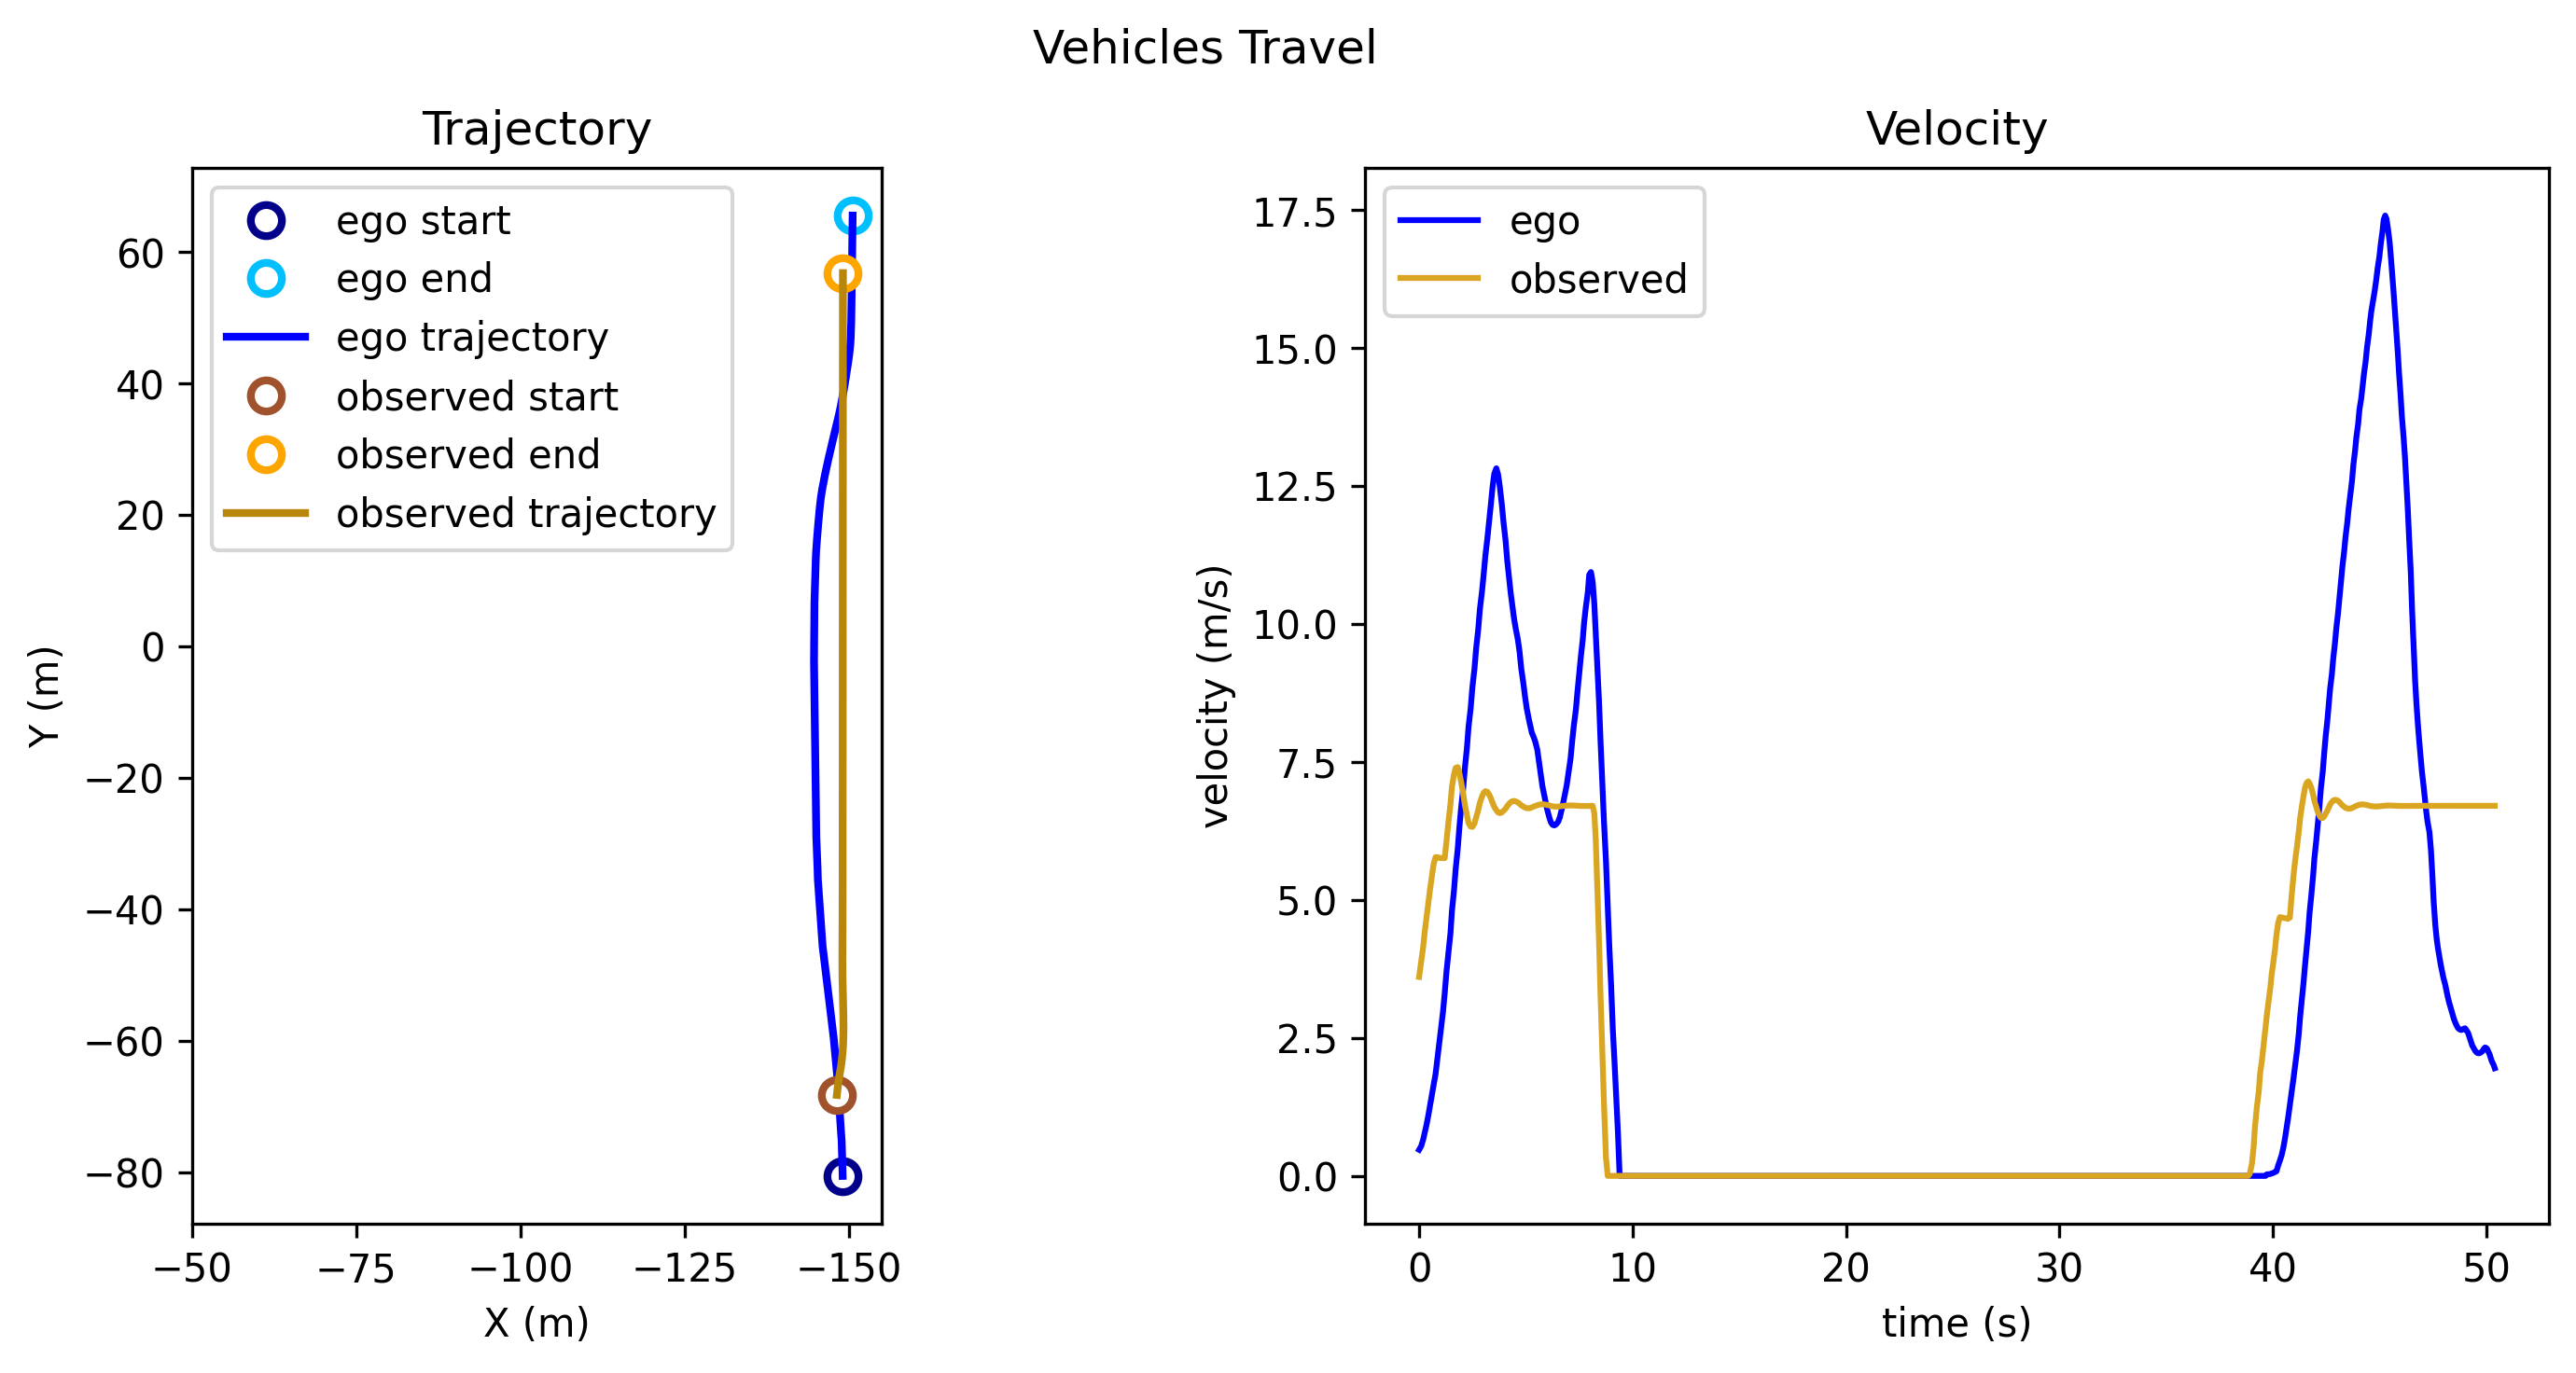

In [14]:
absolute_obj_df1 = obj_to_almost_relative(fusion_df1, sensor_df)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=300)
fig.suptitle("Vehicles Travel")

# Plotting trajectory

start = sensor_df1['x'].iloc[0], sensor_df1['y'].iloc[0]
end = sensor_df1['x'].iloc[-1], sensor_df1['y'].iloc[-1]
axs[0].plot(start[0], start[1], 'o', label='ego start', c='w', ms=8, mew=2, mec='darkblue')
axs[0].plot(end[0], end[1], 'o', label='ego end', c='w', ms=8, mew=2, mec='deepskyblue')

axs[0].plot(sensor_df1['x'], sensor_df1['y'], lw=2, label='ego trajectory', c='b')
    
start = absolute_obj_df1['x'].iloc[0], absolute_obj_df1['y'].iloc[0]
axs[0].plot(start[0], start[1], 'o', label='observed start', c='w', ms=8, mew=2, mec='sienna')

if not is_obj_stopped(absolute_obj_df1):
    end = absolute_obj_df1['x'].iloc[-1], absolute_obj_df1['y'].iloc[-1]
    axs[0].plot(end[0], end[1], 'o', label='observed end', c='w', ms=8, mew=2, mec='orange')

    axs[0].plot(absolute_obj_df1['x'], absolute_obj_df1['y'], lw=2, label='observed trajectory', c='darkgoldenrod')
    
    observed_start_label = 'observed start'
else:
    observed_start_label = 'observed'

axs[0].set(
    title='Trajectory',
    xlabel='X (m)',
    ylabel='Y (m)',
    aspect='equal',
    xlim=(-50, -155)
)
axs[0].legend()

# Plotting velocity

ego_velocity = np.hypot(sensor_df1['vx'], sensor_df1['vy'])
observed_velocity = np.hypot(absolute_obj_df1['vx'], absolute_obj_df1['vy'])

axs[1].plot(sensor_df1['timestamp'], ego_velocity, label='ego', c='b')
axs[1].plot(absolute_obj_df1['timestamp'], observed_velocity, label='observed', c='goldenrod')

axs[1].set(
    title='Velocity',
    xlabel='time (s)',
    ylabel='velocity (m/s)',
)
axs[1].legend()

fig.savefig(f'{EXPERIMENT_NAME}/{EXPERIMENT_VARIATION}_vehicle_travel.png')

In [15]:
errors = fusion_df[fusion_df.association_failed == 1.0]['timestamp']
errors = errors.iloc[1:]  # The first one is never an error

print('Errors', errors.shape[0], fusion_df.shape[0])

d = fusion_df[fusion_df.association_score > 0.1]['association_score']
print(f'Association score (not minimum): {d.mean()} +/- {d.std()}')

Errors 17 1308
Association score (not minimum): 0.9485114678899083 +/- 0.11634885025806932


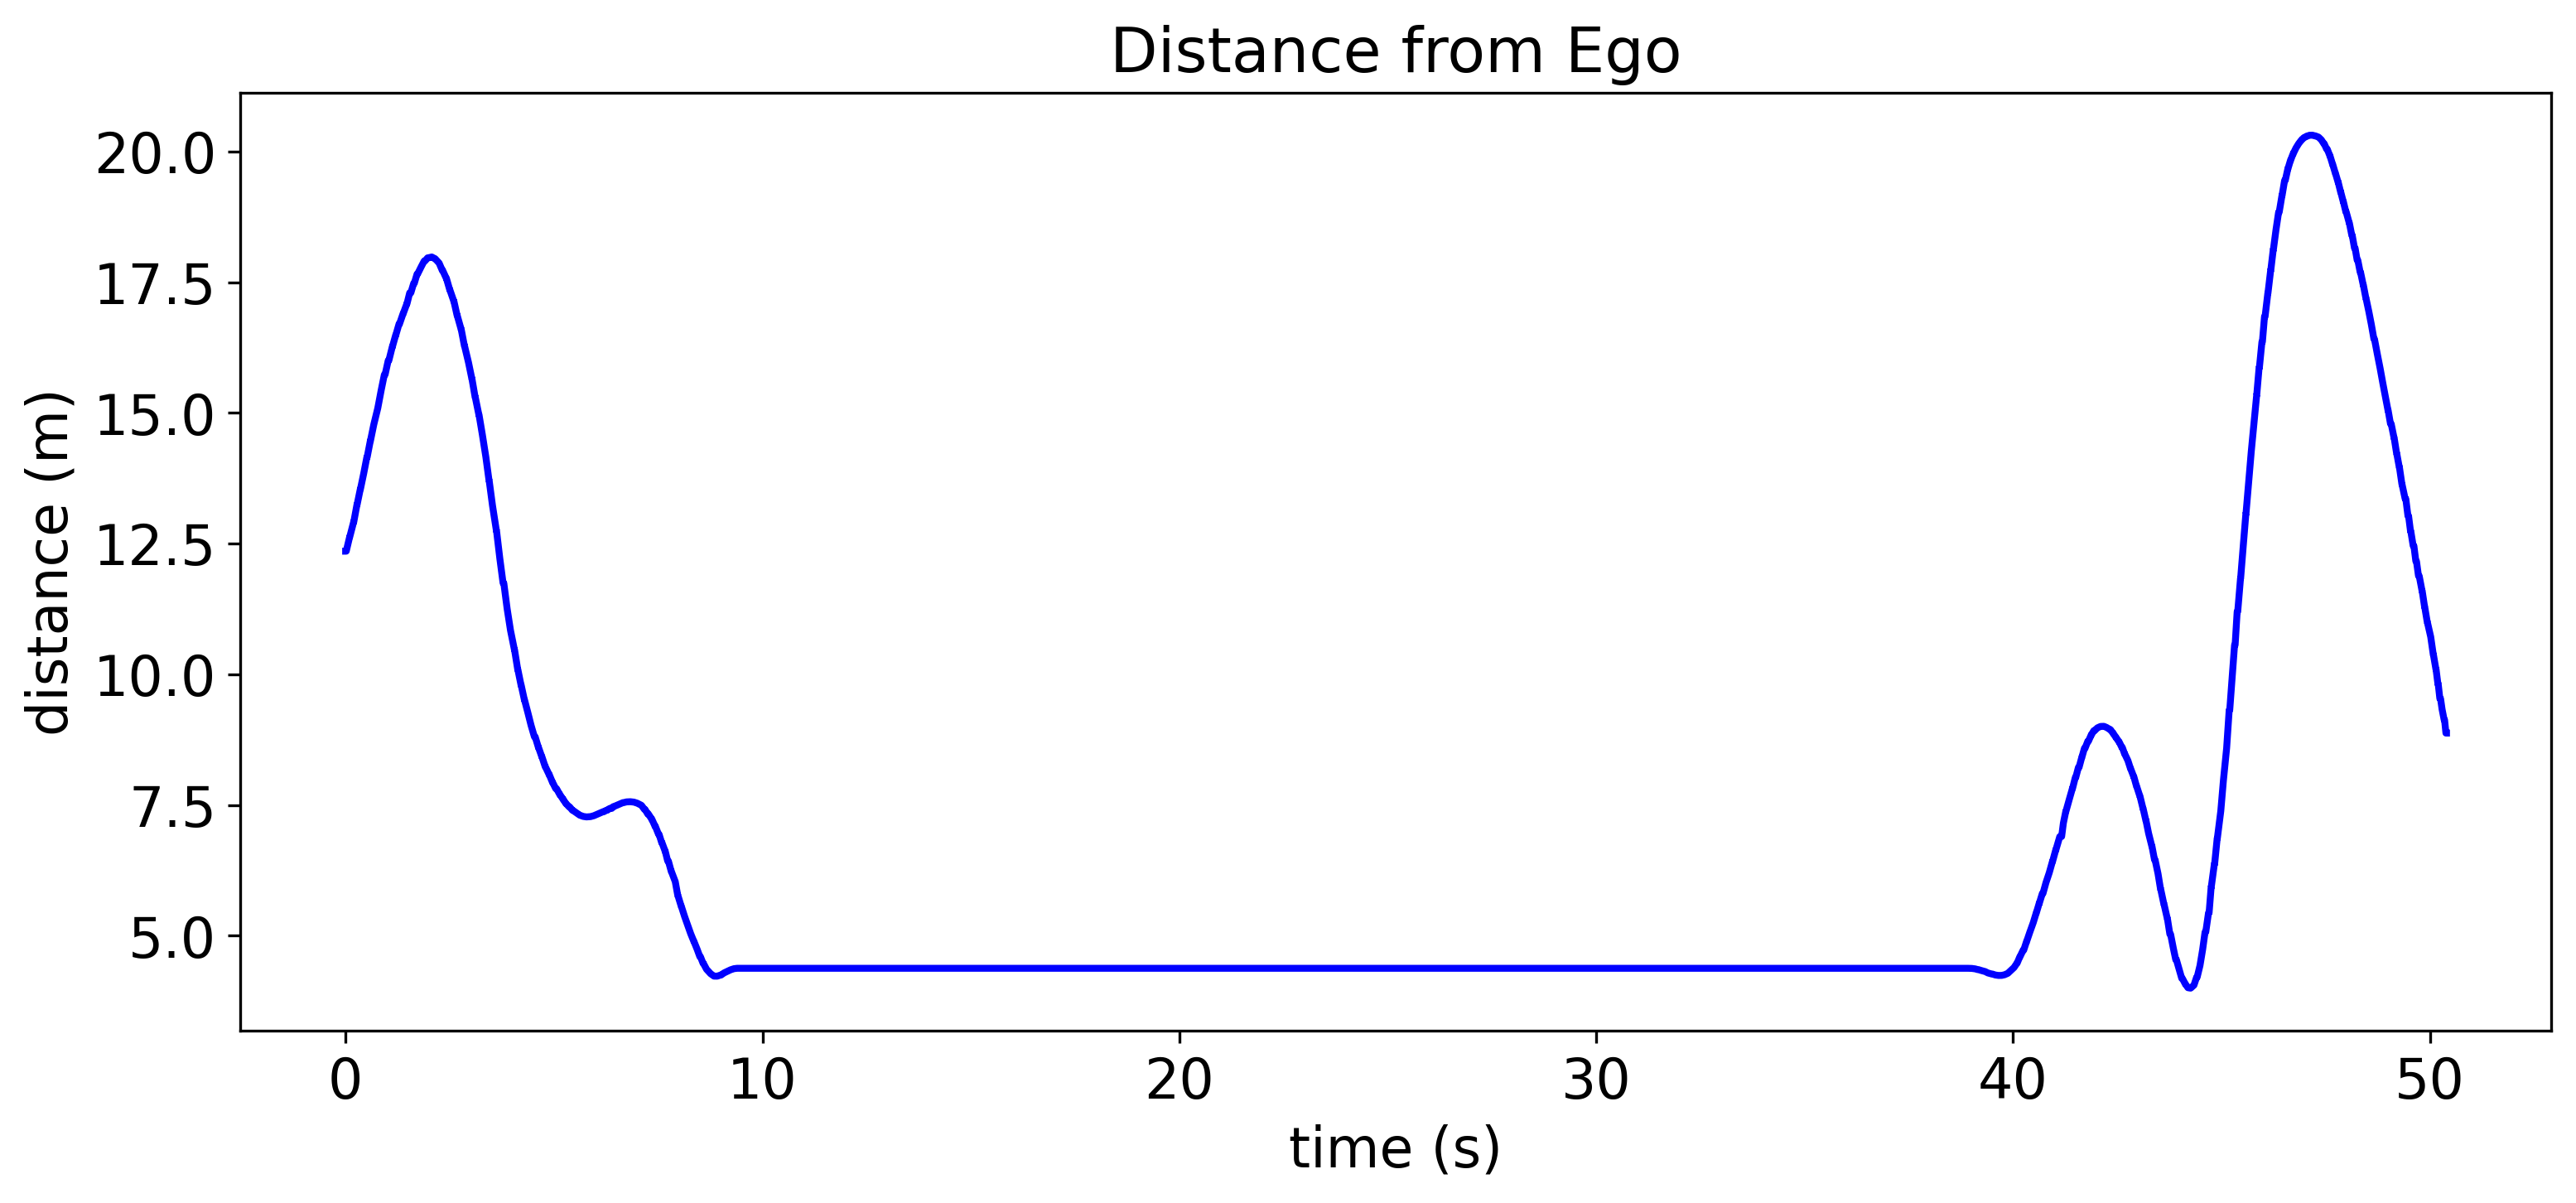

In [16]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

tmp_df = fusion_df.copy()

tmp_df['distance'] = np.hypot(fusion_df['x'], fusion_df['y'])
tmp_df = tmp_df.set_index('timestamp').dropna()

ax.plot(tmp_df['distance'], lw=2, c='b')

ax.set_title('Distance from Ego', fontsize=18)
ax.set_xlabel('time (s)', fontsize=16)
ax.set_ylabel('distance (m)', fontsize=16)
ax.tick_params(labelsize=16)

fig.savefig(f'{EXPERIMENT_NAME}/fusion_layer/{EXPERIMENT_VARIATION}_distance_from_ego.png')

Application DF first measurement: 1621379996728574110


,timestamp,global_list_id,x,y,vx,vy,ax,ay,yaw,yaw_rate,length,width
0,1621379996728574110,1,12.32606,0.85077,3.11015,-0.43930,2.56292,-0.74795,-0.06124,-0.13004,4.18121,1.99412
1,1621379996736378062,2,12.32606,0.85077,3.11015,-0.43930,2.56292,-0.74795,-0.06124,-0.13004,4.18121,1.99412
2,1621379996818674962,3,12.60301,0.79516,3.31587,-0.49978,2.41863,-0.65037,-0.07205,-0.12617,4.18121,1.99412
3,1621379996819963096,4,12.60301,0.79516,3.31587,-0.49978,2.41863,-0.65037,-0.07205,-0.12617,4.18121,1.99412
4,1621379996914020334,5,12.89532,0.70732,3.46177,-0.63282,1.73338,-1.42841,-0.08512,-0.16696,4.18121,1.99412


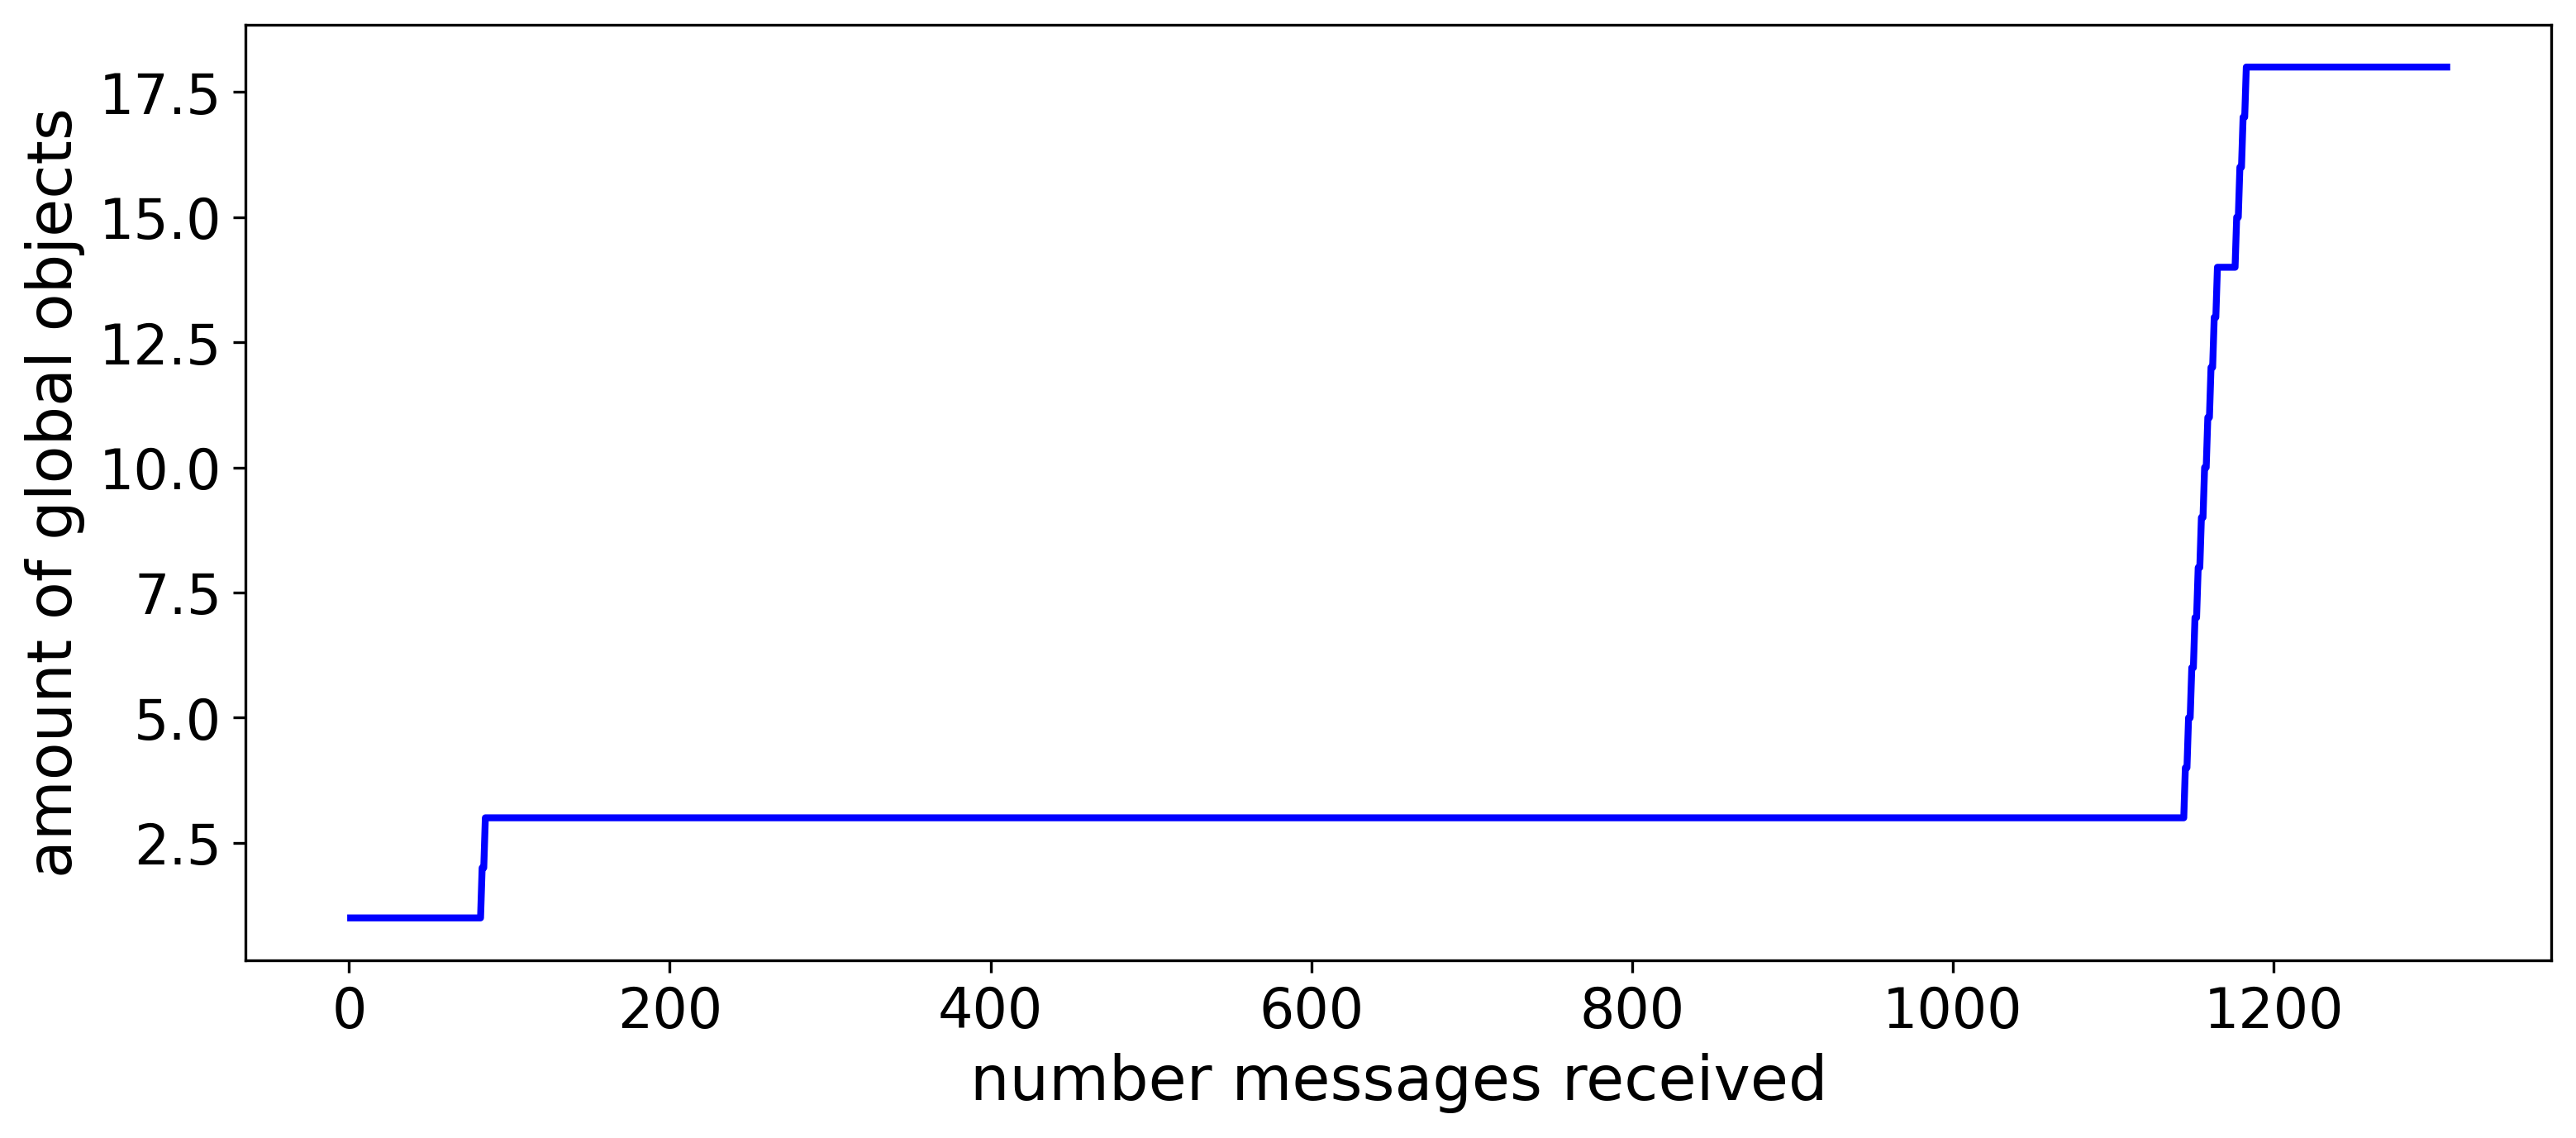

In [17]:
application_df_file = EXPERIMENT_FILES['application_layer'][EXPERIMENT_VARIATION]
application_df = pd.read_csv(
    application_df_file,
    names=['timestamp', 'global_list_id', 'x', 'y', 'vx', 'vy', 'ax', 'ay', 'yaw', 'yaw_rate', 'length', 'width']
)

print('Application DF first measurement:', application_df['timestamp'].min())

fig, ax = plt.subplots(figsize=(12, 5), dpi=300)

amount_objs = application_df.groupby('global_list_id')['timestamp'].count()

ax.plot(amount_objs, lw=2, c='b')
ax.set_xlabel('number messages received', fontsize=18)
ax.set_ylabel('amount of global objects', fontsize=18)
ax.tick_params(labelsize=16)

fig.savefig(f'{EXPERIMENT_NAME}/application_layer/{EXPERIMENT_VARIATION}_amount_global_objs.png')

application_df.head()

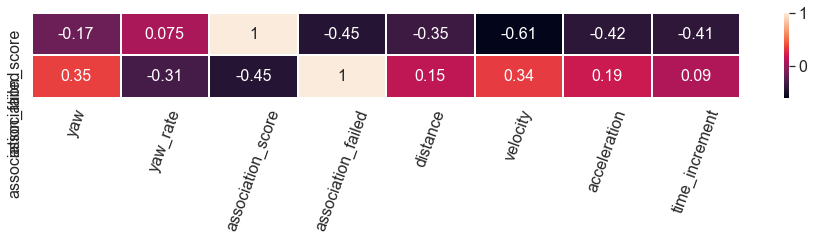

In [18]:
import seaborn as sns

sns.set_theme()

tmp_df = fusion_df.copy()
# tmp_df = tmp_df[tmp_df.timestamp > 40]  # Useful for both moving but without temporal alignment

fig, ax = plt.subplots(figsize=(13, 3.5))

pd.set_option('mode.chained_assignment', None)  # Just disabling assignment warning

tmp_df['distance'] = np.hypot(fusion_df['x'], fusion_df['y'])
tmp_df['velocity'] = np.hypot(fusion_df['vx'], fusion_df['vy'])
tmp_df['acceleration'] = np.hypot(fusion_df['ax'], fusion_df['ay'])
tmp_df['time_increment'] = tmp_df['timestamp'].diff()
tmp_df = tmp_df.dropna()

tmp_df = tmp_df.set_index('timestamp').drop(['idx_to_associate', 'x', 'y', 'vx', 'vy', 'ax', 'ay'], axis=1)

correlation = tmp_df.corr()
correlation = correlation.loc[['association_score', 'association_failed']]
sns.heatmap(correlation, annot=True, linewidths=1, annot_kws={"fontsize":16})

ax.tick_params(labelsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
plt.tight_layout()

plt.show()
fig.savefig(f'{EXPERIMENT_NAME}/fusion_layer/{EXPERIMENT_VARIATION}_error_correlation.png')

In [19]:
duration = sensor_df['timestamp'].max()

print('Number of object measurements:', sensor_df.shape[0])
print('Number of errors:', fusion_df[fusion_df.association_failed == 1.0].shape[0] - 1)
print('Mean Server FPS:', sensor_df1.shape[0]/duration)
print('Mean Measurement Frequency:', sensor_df.shape[0]/duration)
print('Global Objects at the end:', amount_objs.max())
print('Duration:', duration)
print('Maximum relative velocity magnitude', np.hypot(fusion_df['vx'], fusion_df['vy']).max())

fusion_df.tail()

Number of object measurements: 1308
Number of errors: 17
Mean Server FPS: 12.976960310930298
Mean Measurement Frequency: 25.953920621860597
Global Objects at the end: 18
Duration: 50.397010111
Maximum relative velocity magnitude 10.988070910805954


,timestamp,sensor_name,x,y,vx,vy,ax,ay,yaw,yaw_rate,idx_to_associate,association_score,association_failed
1303,50.290821,sensor2,-9.23382,1.35811,4.66251,0.08160,0.94978,0.00020,0.01216,0.00003,17,1.000,0
1304,50.341096,sensor1,-9.02638,1.36170,4.70426,0.08161,0.94335,0.00023,0.01216,0.00003,17,0.810,0
1305,50.351182,sensor2,-9.02638,1.36170,4.70426,0.08161,0.94335,0.00023,0.01216,0.00003,17,1.000,0
1306,50.383584,sensor1,-8.77087,1.36612,4.75451,0.08162,0.93104,0.00024,0.01217,0.00003,17,0.771,0
1307,50.397010,sensor2,-8.77087,1.36612,4.75451,0.08162,0.93104,0.00024,0.01217,0.00003,17,1.000,0
